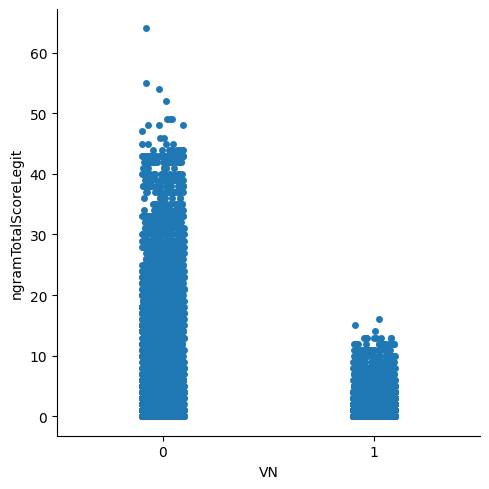

In [46]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#Domain,Verdict,Entropy,Vowel,Consonant,Length,VN,VowelConsRatio,EntropyLength,CountNum,ngram2ScoreLegit,ngram3ScoreLegit,ngram4ScoreLegit,ngram5ScoreLegit,ngramTotalScoreLegit,ngram2ScoreDGA,ngram3ScoreDGA,ngram4ScoreDGA,ngram5ScoreDGA,ngramTotalScoreDGA

dataframe = pd.read_csv('../CSVs/output/outputDataset.csv')
feature = 'ngramTotalScoreLegit'

sns.catplot(x='VN', y = feature, data=dataframe)





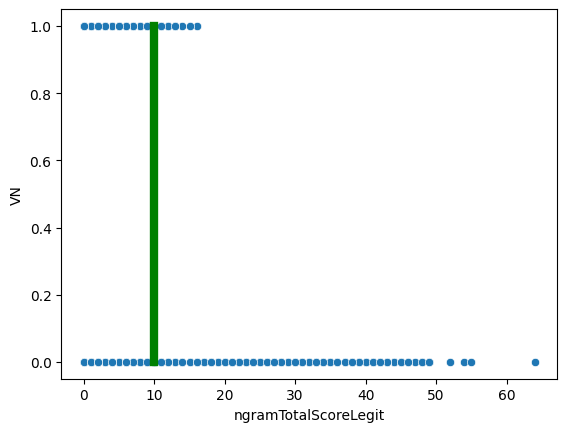

In [47]:
boundary = 10
sns.scatterplot(x = feature, y = 'VN', data = dataframe)
plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 6)

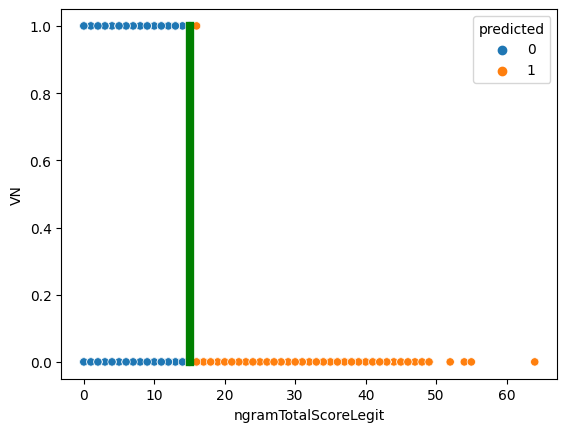

In [48]:
def boundary_classifier(target_boundary,x):
  result = []
  for i in x:
    if i > target_boundary:
      result.append(1)
    else:
      result.append(0)
  return result
     
chosen_boundary = 15
y_pred = boundary_classifier(chosen_boundary, dataframe[feature])
dataframe['predicted'] = y_pred
y_true = dataframe['VN']
sns.scatterplot(x = feature, y = 'VN', hue = 'predicted', data = dataframe)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'g', linewidth = 6)

In [49]:
accuracy = metrics.accuracy_score(y_true,y_pred)
accuracy

0.40549140830984637

Text(0.5, 427.9555555555555, 'Predicted verdict')

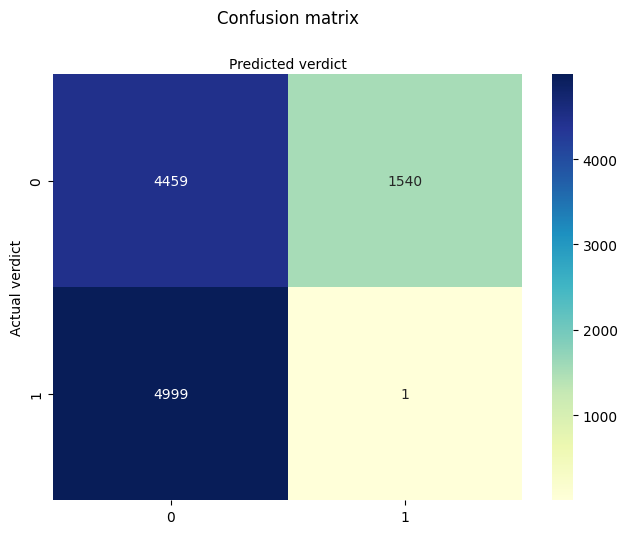

In [50]:
# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
y_test = dataframe['VN']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual verdict')
plt.xlabel('Predicted verdict')

In [51]:
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

model_stats(y_test, y_pred)

Accuracy:  0.40549140830984637
Precision:  0.0006489292667099286
Recall:  0.0002


(10999, 17)
(10999,)
accuracy:  0.9015151515151515
precision:  0.8994565217391305
recall:  0.8820786142571619
f1:  0.8906828119744368


d:\Projects\Python\CapstoneMain\DGA-Advanced-Detection-Tool-DADS-\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 427.9555555555555, 'Predicted verdict')

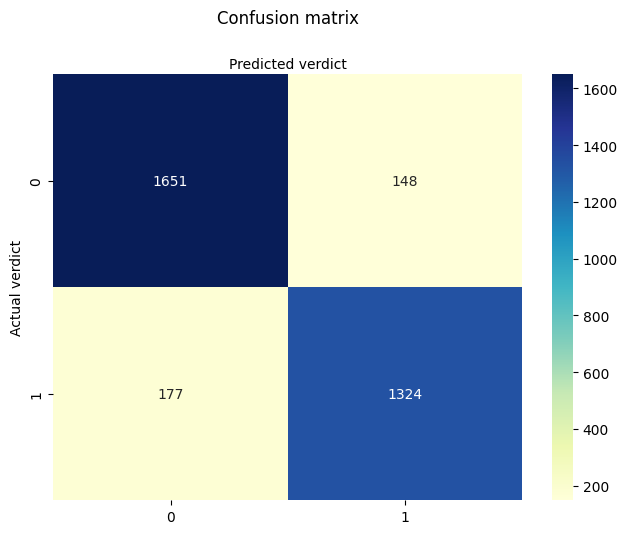

In [17]:
import pandas as pd
import numpy as np
from sklearn import metrics
import saveModel as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import seaborn as sns

DGAList = pd.read_csv('..\\CSVs\\output\\outputDataset.csv')
# Replace infinite updated data with nan
DGAList.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
DGAList.dropna(inplace=True)

#Drop columns
#Create a list of feature
X = DGAList.drop(['Domain','Verdict', 'VN', "Unnamed: 0"], axis=1)
#create a list of verdicts
y = DGAList['VN']
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_test)

#evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: ", recall)
print("f1: ", f1)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual verdict')
plt.xlabel('Predicted verdict')



In [35]:
#x_data = DGAList['ngramTotalScoreLegit']
#x_data = DGAList[DGAList['CountNum'] < 20]
x_data = DGAList['CountNum']
y_data = DGAList['VN']

sns.regplot(x=x_data, y=y_data, data=DGAList, logistic=True, ci=None)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 10997 and the array at index 1 has size 10999